In [1]:
import pandas as pd
import seaborn as sns

import sys
sys.path.append('путь_до_папки/vulnerable_populations/additional_functions')
from functions import to_modify_dataframe, transform_to_changes

##### Прочитаем данные о валовом региональном продукте (ВРП) на душу населения и предобработаем их.

In [2]:
gross_regional_product = pd.read_excel(
    io='../social_russia_data/gross_regional_product_1996_2020.xls', sheet_name=0, header=2, index_col=0
)
gross_regional_product = to_modify_dataframe(gross_regional_product)
gross_regional_product = gross_regional_product.rename(lambda arg: f'ВРП на душу населения в {arg} году, руб.', axis=1)
gross_regional_product.head()

Число регионов России - 85.


,"ВРП на душу населения в 1998 году, руб.","ВРП на душу населения в 1999 году, руб.","ВРП на душу населения в 2000 году, руб.","ВРП на душу населения в 2001 году, руб.","ВРП на душу населения в 2002 году, руб.","ВРП на душу населения в 2003 году, руб.","ВРП на душу населения в 2004 году, руб.","ВРП на душу населения в 2005 году, руб.","ВРП на душу населения в 2006 году, руб.","ВРП на душу населения в 2007 году, руб.",...,"ВРП на душу населения в 2011 году, руб.","ВРП на душу населения в 2012 году, руб.","ВРП на душу населения в 2013 году, руб.","ВРП на душу населения в 2014 году, руб.","ВРП на душу населения в 2015 году, руб.","ВРП на душу населения в 2016 году, руб.","ВРП на душу населения в 2017 году, руб.","ВРП на душу населения в 2018 году, руб.","ВРП на душу населения в 2019 году, руб.","ВРП на душу населения в 2020 году, руб."
Белгородская область,12242.8,21398.0,27969.5,33126.7,41327.4,50271.4,75629.4,95911.2,118211.4,156225.1,...,331010.0,354570.6,368874.8,400820.8,447619.7,501467.8,539720.5,588641.5,617426.5,646569.0
Брянская область,7659.1,11752.4,17413.5,21511.9,27020.0,31953.4,37719.1,49923.4,62187.8,78518.8,...,137187.1,164726.6,175865.0,196096.7,221080.0,258752.7,280630.1,304547.1,332442.8,347204.5
Владимирская область,9350.2,15457.1,21073.3,27170.0,32923.6,40809.4,49353.4,58261.0,76184.8,99682.5,...,181842.6,200456.4,216320.8,232757.6,262945.5,309713.7,325043.1,349856.4,394560.3,410443.6
Воронежская область,9082.1,14808.3,20365.1,24905.4,34789.6,42237.5,49530.0,56534.5,70492.7,94849.5,...,203575.5,241947.4,262578.3,308004.7,345566.8,354657.9,374125.7,408140.7,431037.0,459629.5
Ивановская область,6804.5,9765.2,14240.0,18947.2,23396.9,29192.4,35732.7,40039.1,50271.5,68865.7,...,121945.5,129448.3,151263.6,146032.6,174687.5,200504.4,208522.0,230325.5,249591.6,273821.5


##### После предобработки осталось много столбцов до 2015 года. Давайте на примере Севастополя посмотрим, действительно ли там нет пропусков.

In [3]:
gross_regional_product.loc['Севастополь']

ВРП на душу населения в 1998 году, руб.         0.0
ВРП на душу населения в 1999 году, руб.         0.0
ВРП на душу населения в 2000 году, руб.         0.0
ВРП на душу населения в 2001 году, руб.         0.0
ВРП на душу населения в 2002 году, руб.         0.0
ВРП на душу населения в 2003 году, руб.         0.0
ВРП на душу населения в 2004 году, руб.         0.0
ВРП на душу населения в 2005 году, руб.         0.0
ВРП на душу населения в 2006 году, руб.         0.0
ВРП на душу населения в 2007 году, руб.         0.0
ВРП на душу населения в 2008 году, руб.         0.0
ВРП на душу населения в 2009 году, руб.         0.0
ВРП на душу населения в 2010 году, руб.         0.0
ВРП на душу населения в 2011 году, руб.         0.0
ВРП на душу населения в 2012 году, руб.         0.0
ВРП на душу населения в 2013 году, руб.         0.0
ВРП на душу населения в 2014 году, руб.     78009.3
ВРП на душу населения в 2015 году, руб.    119384.5
ВРП на душу населения в 2016 году, руб.    211366.0
ВРП на душу 

##### Формально пропусков нет, однако все данные до 2014 года нулевые. В связи с тем, что получить данные за те годы по Крыму и Севастополю трудно, я предлагаю эти столбцы удалить.

In [4]:
gross_regional_product = gross_regional_product.drop(columns=[
    column for column in gross_regional_product.columns if gross_regional_product.loc['Севастополь'][column] == 0
])
gross_regional_product.head()

,"ВРП на душу населения в 2014 году, руб.","ВРП на душу населения в 2015 году, руб.","ВРП на душу населения в 2016 году, руб.","ВРП на душу населения в 2017 году, руб.","ВРП на душу населения в 2018 году, руб.","ВРП на душу населения в 2019 году, руб.","ВРП на душу населения в 2020 году, руб."
Белгородская область,400820.8,447619.7,501467.8,539720.5,588641.5,617426.5,646569.0
Брянская область,196096.7,221080.0,258752.7,280630.1,304547.1,332442.8,347204.5
Владимирская область,232757.6,262945.5,309713.7,325043.1,349856.4,394560.3,410443.6
Воронежская область,308004.7,345566.8,354657.9,374125.7,408140.7,431037.0,459629.5
Ивановская область,146032.6,174687.5,200504.4,208522.0,230325.5,249591.6,273821.5


##### Теперь посмотрим на корреляцию оставшихся признаков.

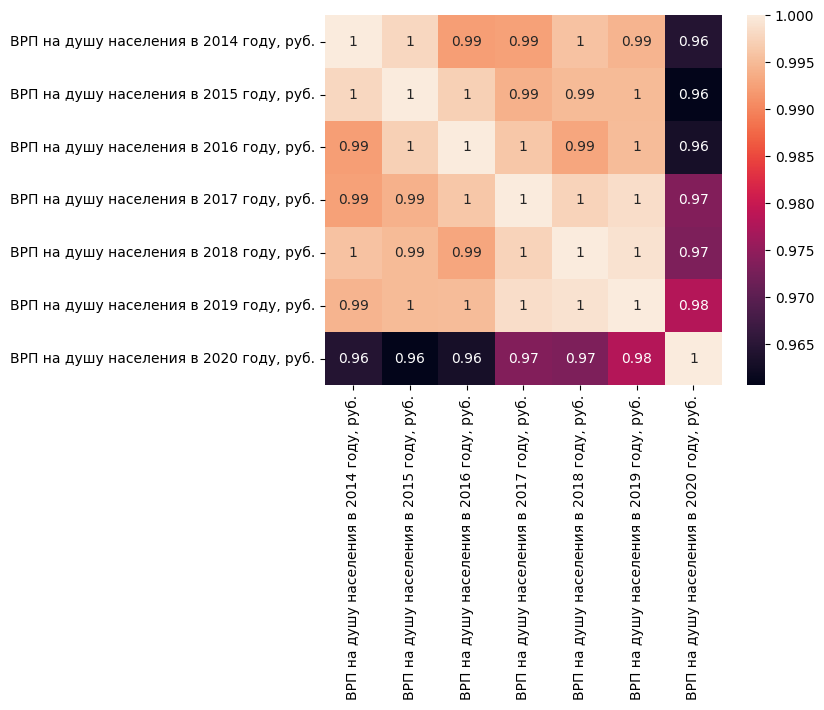

In [5]:
sns.heatmap(gross_regional_product.corr(), annot=True);

##### Данные сильно скоррелированны. Поэтому рассмотрим динамику изменения рассматриваемого показателя.

In [6]:
gross_regional_product_changes = transform_to_changes(gross_regional_product)
gross_regional_product_changes = gross_regional_product_changes.rename(
    lambda arg: 'Динамика ' + arg, axis=1
)
gross_regional_product_changes.head()

,"Динамика ВРП на душу населения в 2015 году, руб.","Динамика ВРП на душу населения в 2016 году, руб.","Динамика ВРП на душу населения в 2017 году, руб.","Динамика ВРП на душу населения в 2018 году, руб.","Динамика ВРП на душу населения в 2019 году, руб.","Динамика ВРП на душу населения в 2020 году, руб."
Белгородская область,11.675766,12.029877,7.628147,9.064136,4.890073,4.719995
Брянская область,12.740296,17.040302,8.454946,8.522607,9.159733,4.440373
Владимирская область,12.969673,17.786271,4.949539,7.633849,12.777785,4.025570
Воронежская область,12.195301,2.630779,5.489177,9.091864,5.609904,6.633421
Ивановская область,19.622262,14.778905,3.998715,10.456211,8.364727,9.707819


##### Однако оставим показаели ВРП на душу населения за 2020 год.

In [7]:
gross_regional_product = gross_regional_product.drop(columns=[
    gross_regional_product.columns[i] for i in range(len(gross_regional_product.columns) - 1)
])
gross_regional_product.head()

,"ВРП на душу населения в 2020 году, руб."
Белгородская область,646569.0
Брянская область,347204.5
Владимирская область,410443.6
Воронежская область,459629.5
Ивановская область,273821.5


##### Смотрим корреляцию между получившимися признаками.

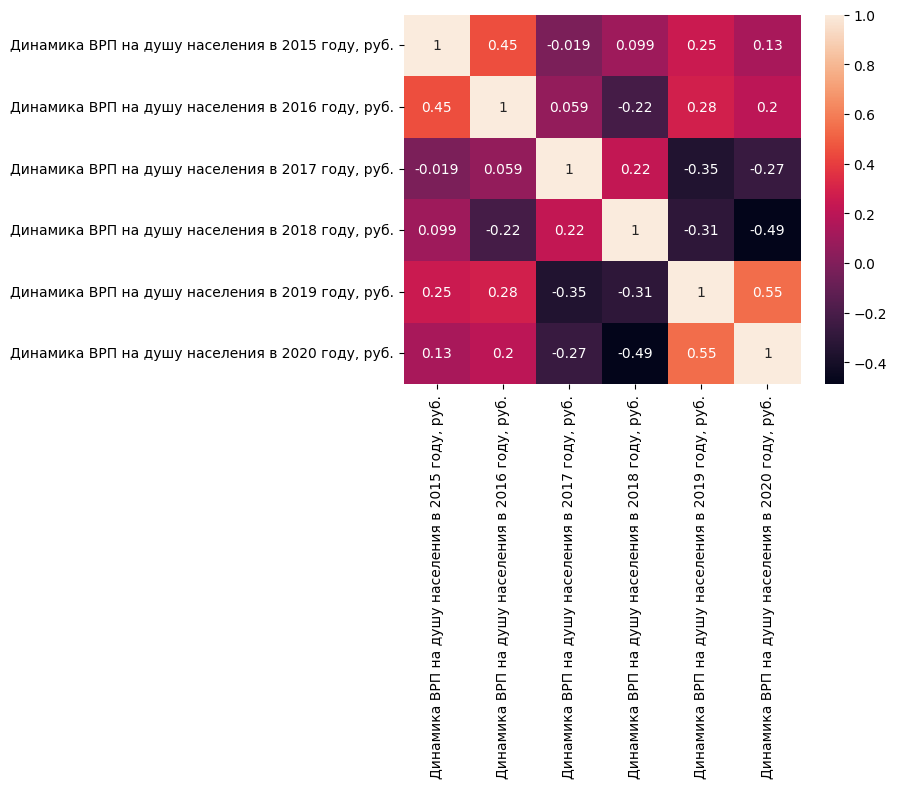

In [8]:
sns.heatmap(gross_regional_product_changes.corr(), annot=True);

##### Сильной корреляции между признаками нет.

In [9]:
gross_regional_product.to_csv('../datasets_mod/gross_regional_product.csv', sep=',')
gross_regional_product_changes.to_csv('../datasets_mod/gross_regional_product_changes.csv', sep=',')